In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-aer

In [22]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Como generar un circuito cuantico

In [20]:
### Generación de registros segun sea el caso ###
n = 1 # Numero de qubits de nuestro circuito
qubits = QuantumRegister(n)
bits = ClassicalRegister(n)

### Generación de circuito cuántico ###
# Paso 1: Crear un circuito cuántico.
qc = QuantumCircuit(qubits, bits)
# Paso 2: Aplicar compuertas.
qc.h(qubits[0])

### Barrera para visualización ###
qc.barrier()
### Barrera para visualización ###

# Paso 3: Medir los qubits
qc.measure(qubits, bits)  # Medimos ambos qubits y almacenamos los resultados en los bits clásicos correspondientes
# Visualizamos el circuito
print(qc.draw())

      ┌───┐ ░ ┌─┐
  q6: ┤ H ├─░─┤M├
      └───┘ ░ └╥┘
c5: 1/═════════╩═
               0 



Resultados de la simulación:
{'0': 506, '1': 518}


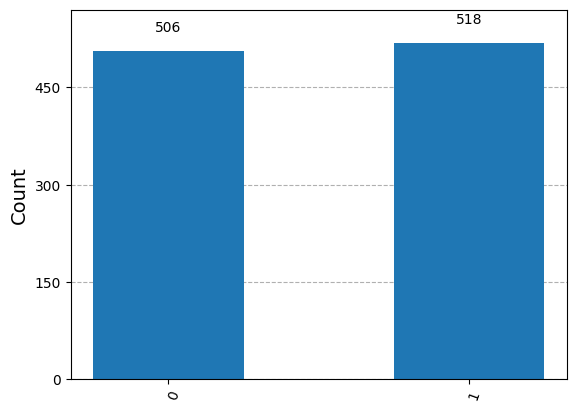

In [16]:
# Paso 4: Ejecutar el circuito en un simulador
simulator = AerSimulator()  # Utilizamos el simulador AerSimulator de Qiskit Aer
compiled_circuit = transpile(qc, simulator)  # Compilamos el circuito para el simulador
result = simulator.run(compiled_circuit, shots=1024).result()  # Ejecutamos el circuito y obtenemos los resultados
# Paso 5: Obtener y visualizar los resultados
counts = result.get_counts(qc)  # Obtenemos el conteo de cada resultado
print("\nResultados de la simulación:")
print(counts)  # Mostramos los resultados en la consola
# Visualizamos los resultados en un histograma
plot_histogram(counts)

## Como inicializar un estado arbitrario para un qubit

En este caso usaremos el metodo ".initialize()" donde inicializaremos el estado de un qubit usando las amplitudes $\left[ \frac{1}{\sqrt{3}}, \frac{\sqrt{2}}{\sqrt{3}}  \right]$.

In [27]:
### Generación de registros segun sea el caso ###
n = 1 # Numero de qubits de nuestro circuito
qubits = QuantumRegister(n)
bits = ClassicalRegister(n)

### Generación de circuito cuántico ###
# Paso 1: Crear un circuito cuántico.
qc = QuantumCircuit(qubits, bits)
# Paso 2: Inicializar estado normalizado a un qubit.
qc.initialize([1/np.sqrt(3), np.sqrt(2)/np.sqrt(3)], 0) # En pos1 = valores de amplitudes normalizadas, pos2 = numero de qubit.

### Barrera para visualización ###
qc.barrier()
### Barrera para visualización ###

# Visualizamos el circuito
print(qc.draw())

      ┌────────────────────────────┐ ░ 
 q10: ┤ Initialize(0.57735,0.8165) ├─░─
      └────────────────────────────┘ ░ 
c9: 1/═════════════════════════════════
                                       


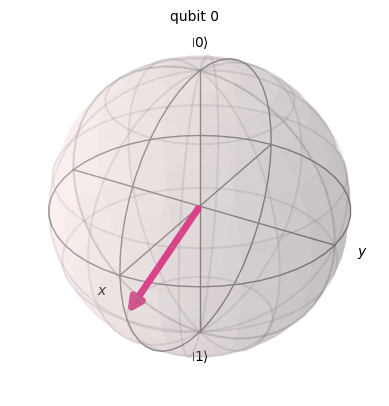

In [28]:
# Generar el vector de estado del circuito, sin simularlo con AerSimulator.
estado_final = Statevector.from_instruction(qc)

# Visualizar el estado final en la esfera de Bloch para cada qubit
plot_bloch_multivector(estado_final)